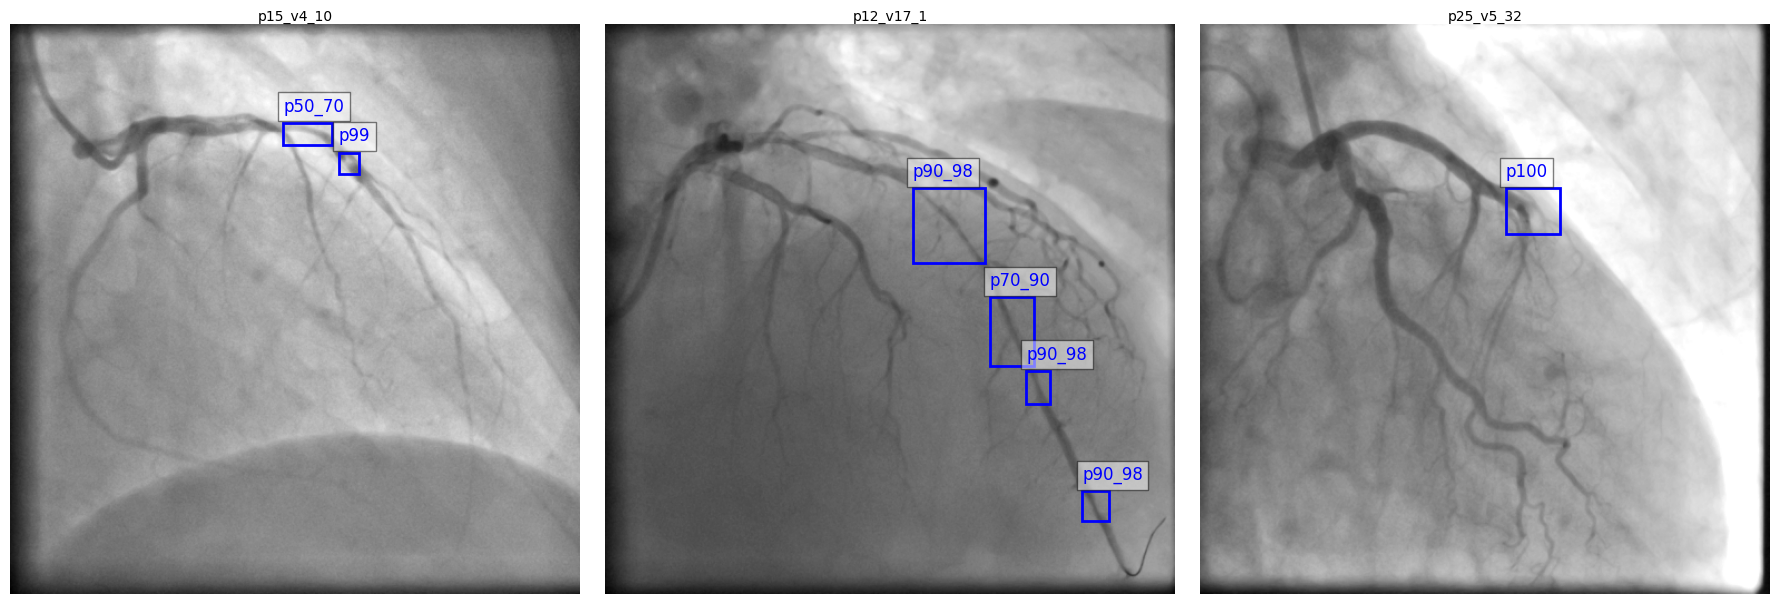

In [14]:
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

def visualize_bounding_boxes(df, patient_video_frame, ax=None):
    patient, video, frame = patient_video_frame.split("_")
    frame = int(frame)  

    row = df[(df['Patient'] == patient) & (df['Video'] == video) & (df['Frame'] == frame)]
    if row.empty:
        raise ValueError(f"No data found for input: {patient_video_frame}")

    image_path = row.iloc[0]['SelectedFramesLesionVideo']
    bbox_file_path = row.iloc[0]['GroundTruthFile']

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    if not os.path.exists(bbox_file_path):
        raise FileNotFoundError(f"Ground truth file not found: {bbox_file_path}")

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

    # Read and parse bounding box file
    with open(bbox_file_path, 'r') as file:
        bbox_data = file.readlines()

    bboxes = []
    for line in bbox_data:
        parts = line.strip().split()
        x, y, w, h = map(int, parts[:4])  # First 4 elements are [x, y, w, h]
        tag = parts[4]  # Last element is the lesion tag
        bboxes.append((x, y, w, h, tag))

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    ax.axis('off')

    for (x, y, w, h, tag) in bboxes:
        ax.add_patch(plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='blue', facecolor='none'))
        ax.text(x, y -10, tag, color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    ax.set_title(f"{patient_video_frame}", fontsize=10, pad=-10)
    return ax

data = pd.read_csv(filepath_or_buffer="/home/mario/Python/Datasets/CADICA_Project/information_dataset.csv")

inputs_1 = ["p1_v11_26", "p23_v1_15", "p23_v10_10"]
inputs = ["p15_v4_10", "p12_v17_1", "p25_v5_32"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, patient_video_frame in enumerate(inputs):
    visualize_bounding_boxes(data, patient_video_frame, ax=axes[i])

plt.tight_layout()
plt.savefig('show_images_2.png')
plt.show()


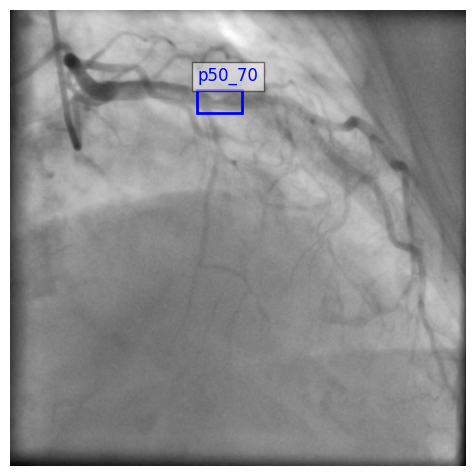

In [50]:
patient_video_frame = "p26_v2_28"

fig, axes = plt.subplots(1, 1, figsize=(5,5))

visualize_bounding_boxes(data, patient_video_frame, ax=axes)

plt.tight_layout()
plt.title("")
plt.savefig(f'/home/mario/Python/Datasets/CADICA_Images/image_cadica_{patient_video_frame}.svg', bbox_inches='tight', pad_inches=0)
plt.show()


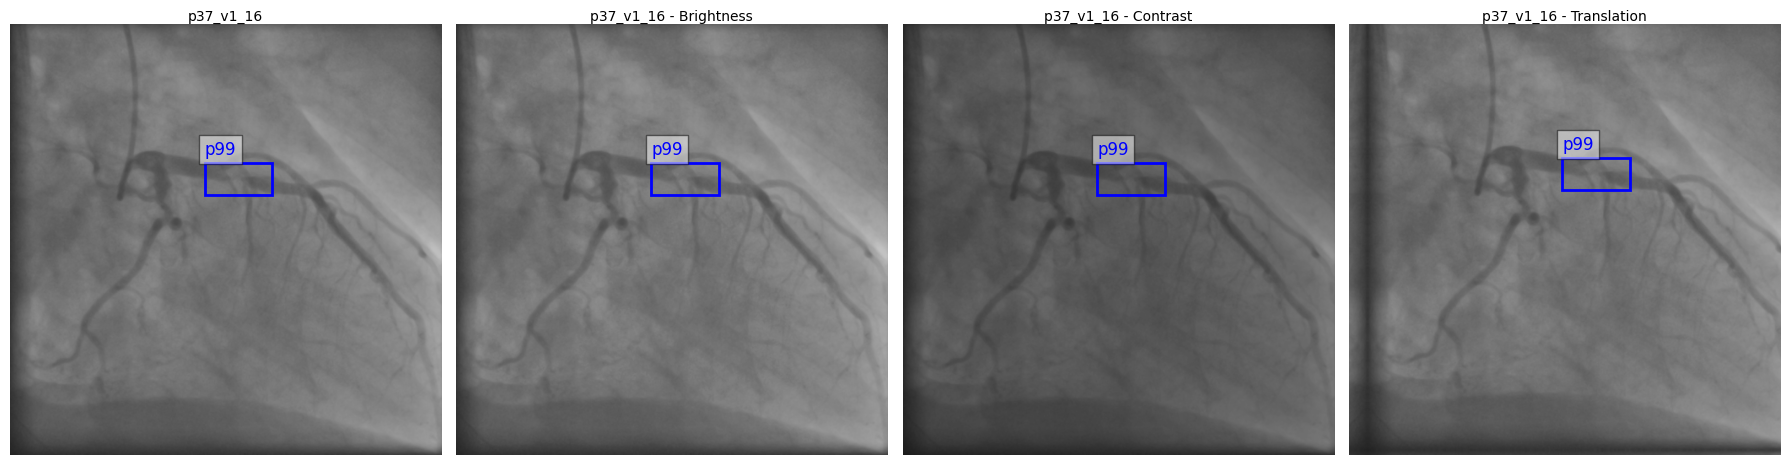

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

def visualize_bounding_boxes_new(df, frame_path, title=None, ax=None):
    """
    Visualize bounding boxes for a given frame using the new CSV structure.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'Frame_path' and 'Groundtruth_path'.
        frame_path (str): Path to the frame image.
        title (str): Custom title for the image.
        ax (plt.Axes): Matplotlib axes for the plot.
        
    Returns:
        plt.Axes: Axes with the bounding boxes drawn.
    """
    # Filter the row based on the frame path
    row = df[df['Frame_path'] == frame_path]
    if row.empty:
        raise ValueError(f"No data found for input: {frame_path}")

    image_path = row.iloc[0]['Frame_path']
    bbox_file_path = row.iloc[0]['Groundtruth_path']

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    if not os.path.exists(bbox_file_path):
        raise FileNotFoundError(f"Ground truth file not found: {bbox_file_path}")

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read and parse bounding box file
    with open(bbox_file_path, 'r') as file:
        bbox_data = file.readlines()

    bboxes = []
    for line in bbox_data:
        parts = line.strip().split()
        x, y, w, h = map(int, parts[:4])  # [x, y, w, h]
        tag = parts[4]  # Tag for the bounding box
        bboxes.append((x, y, w, h, tag))

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    ax.axis('off')

    # Draw bounding boxes
    for (x, y, w, h, tag) in bboxes:
        ax.add_patch(plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='blue', facecolor='none'))
        ax.text(x, y - 10, tag, color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    # Set the title
    title = title if title else os.path.basename(frame_path)
    ax.set_title(title, fontsize=10, pad=-10)
    return ax

fig, axes = plt.subplots(1, 4, figsize=(18, 6))

data = pd.read_csv(filepath_or_buffer="/home/mario/Python/Datasets/CADICA_Project/information_dataset.csv")
visualize_bounding_boxes(data, "p37_v1_16", ax=axes[0])

# Load the new CSV
data = pd.read_csv("/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/augmented_val.csv")

# Example inputs
inputs = [
    {"frame_path": "/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/val/images/lesion/p37_v1/p37_v1_00016_brightness_2.png",
     "title": "p37_v1_16 - Brightness"},
    {"frame_path": "/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/val/images/lesion/p37_v1/p37_v1_00016_contrast_1.png",
     "title": "p37_v1_16 - Contrast"},
    {"frame_path": "/home/mario/Python/Datasets/CADICA_Project/CADICA_Augmented_Images/val/images/lesion/p37_v1/p37_v1_00016_translation_2.png",
     "title": "p37_v1_16 - Translation"}
]

for i, input_data in enumerate(inputs):
    frame_path = input_data["frame_path"]
    title = input_data["title"]
    visualize_bounding_boxes_new(data, frame_path, title=title, ax=axes[i+1])

plt.tight_layout()
plt.savefig(f'/home/mario/Python/Datasets/CADICA_Images/augmentation.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

